# Guest Stars in The Office

The Office! What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.

In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: datasets/office_episodes.csv, which was downloaded from Kaggle [here](https://www.kaggle.com/datasets/nehaprabhavalkar/the-office-dataset).

## Importing libraries and data

In [1]:
# Uncomment if you don't have this libraries
# !pip install pandas
# !pip install matplotlib

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading data
theoffice_df = pd.read_csv('dataset/office_episodes.csv')
theoffice_df.info()
theoffice_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


## Looking for null data in the interest columns

In [4]:
theoffice_df.scaled_ratings.unique()

array([0.28125, 0.53125, 0.375  , 0.46875, 0.5625 , 0.34375, 0.65625,
       0.5    , 0.625  , 0.71875, 0.78125, 0.59375, 0.875  , 0.75   ,
       0.4375 , 0.40625, 0.6875 , 0.8125 , 0.84375, 0.90625, 0.96875,
       0.3125 , 0.0625 , 0.25   , 1.     , 0.21875, 0.09375, 0.     ,
       0.15625, 0.125  ])

In [5]:
theoffice_df['scaled_ratings'].isna().sum()

0

In [6]:
theoffice_df['episode_number'].isna().sum()

0

In [7]:
theoffice_df['viewership_mil'].isna().sum()

0

* Don't is a ploblem if the column guest_stars has null values, because not all episodes has a guest

## Creating collor scheme and sizing system

In [8]:
# Creating the collor scheme
# Ratings < 0.25 are colored "red"
# Ratings >= 0.25 and < 0.50 are colored "orange"
# Ratings >= 0.50 and < 0.75 are colored "lightgreen"
# Ratings >= 0.75 are colored "darkgreen"

colors = []

for item, row in theoffice_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.5:
        colors.append('orange')
    elif row['scaled_ratings'] >= 0.50 and row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    elif row['scaled_ratings'] >= 0.75:
        colors.append('darkgreen')

colors[0:10]

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen']

In [9]:
# Creating sizing system
sizes = theoffice_df['has_guests'].apply(lambda x: 250 if x else 25)
sizes

0       25
1       25
2       25
3       25
4       25
      ... 
183     25
184     25
185    250
186     25
187    250
Name: has_guests, Length: 188, dtype: int64

## Ploting the data

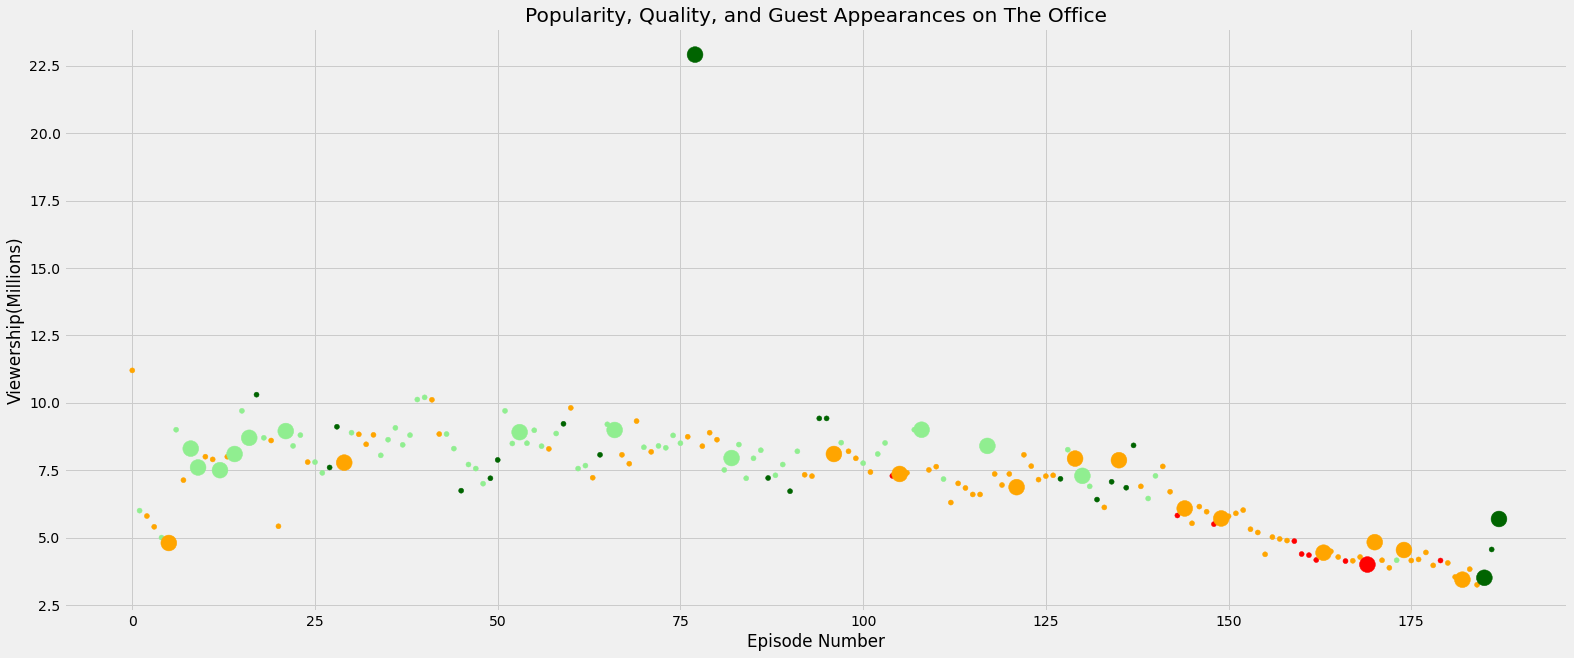

In [10]:
# Creating a figure and increasing the figure size
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(24,10))

# Creating a scatter plot
plt.scatter(x=theoffice_df['episode_number'], y=theoffice_df['viewership_mil'], c=colors, s=sizes)

plt.title('Popularity, Quality, and Guest Appearances on The Office')

plt.xlabel('Episode Number')
plt.ylabel('Viewership(Millions)')

plt.show()


## Finding the Guest Stars of the most viewed The Office episode

In [11]:
# Finding the guest_stars of the most viewed The Office episode
# 9 is the index of the column 'guest_stars'
top_star = theoffice_df.iat[theoffice_df['viewership_mil'].idxmax(),9]
print(f'The top guest stars are: {top_star}')

The top guest stars are: Cloris Leachman, Jack Black, Jessica Alba


## Bonus: Differentiating guest appearance with a star

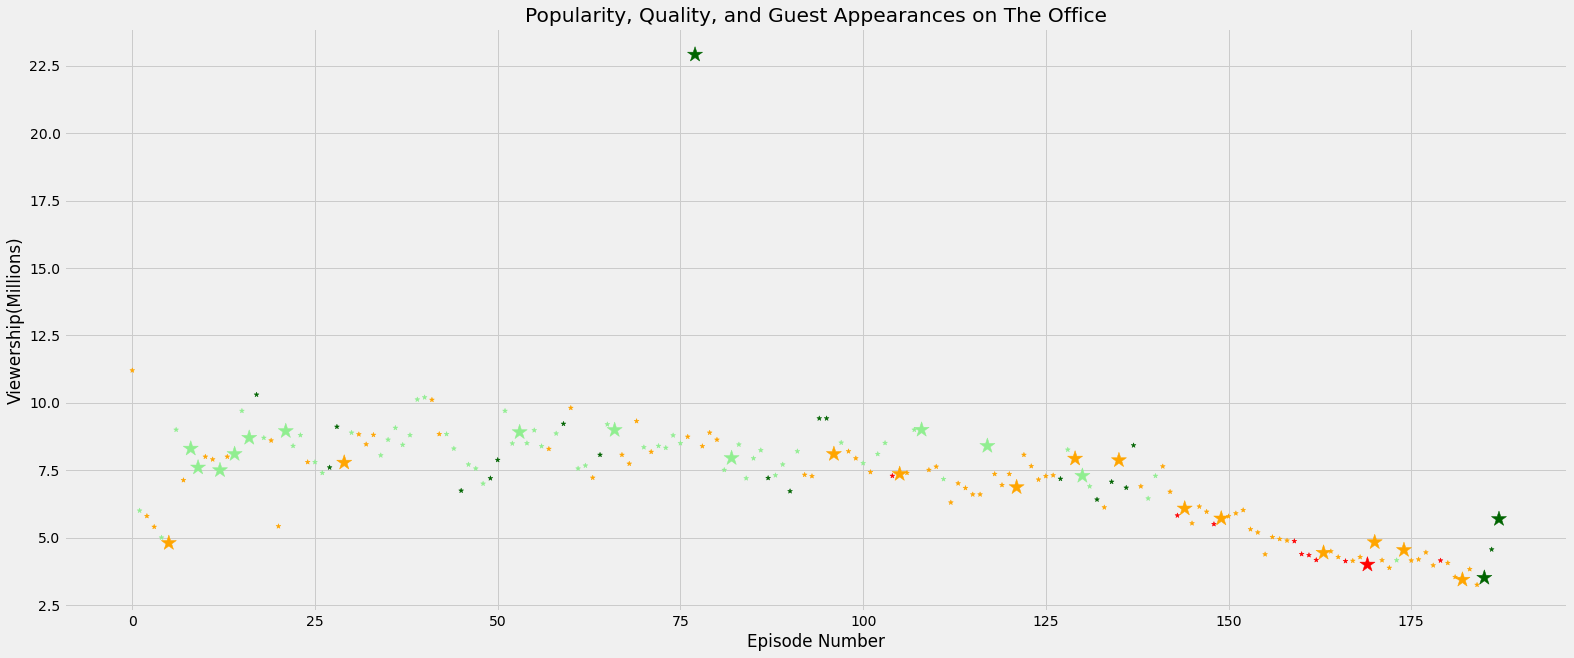

In [12]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(24,10))

# The appearance was changed using the argument marker:
plt.scatter(x=theoffice_df['episode_number'], y=theoffice_df['viewership_mil'], c=colors, s=sizes, marker='*')

plt.title('Popularity, Quality, and Guest Appearances on The Office')

plt.xlabel('Episode Number')
plt.ylabel('Viewership(Millions)')

plt.show()